In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import SGDRegressor
from collections import Counter
from scipy.optimize import minimize
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.linalg import eigh as sp_eigh
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score

Мной был выбран датасет Used Car Price Prediction Dataset, url : https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset?resource=download, в данном датасете присутвуют пропущенные значения

In [2]:
#1. считывание данных
df=pd.read_csv("C:/Users/yaneg/Downloads/used_cars.csv")
print(df.isnull().sum())
# мы знаем, что для типа топлива и факта аварии присутвуют пропущенные значения

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


EDA И Feature Engineering

In [3]:
#необходимо привести такие приззнаки, как пробег и цену  к числовым

df1=pd.read_csv("C:/Users/yaneg/Downloads/used_cars.csv")
df1
df['milage']=df1['milage']
df['price']=df["price"].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '').astype(float)
df['milage']=df['milage'].str.replace('mi.', '', regex=False)
df['milage']=df['milage'].str.replace(',', '').astype(float)

EDA

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


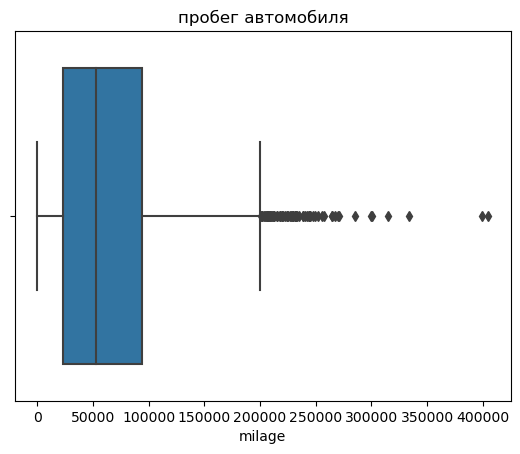

In [4]:
sns.boxplot(x = 'milage', data = df)
plt.title('пробег автомобиля')
plt.show()

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


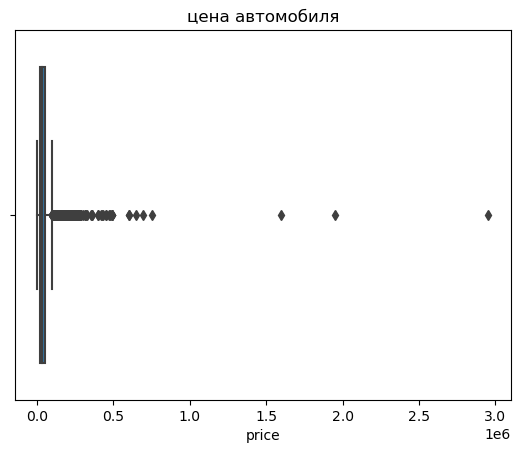

In [5]:
# основная часть в диапазоне от 25 до 100 тысяч пробега

df['milage'].describe()
df['price'].describe()

sns.boxplot(x = 'price', data = df)
plt.title('цена автомобиля')
plt.show()

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


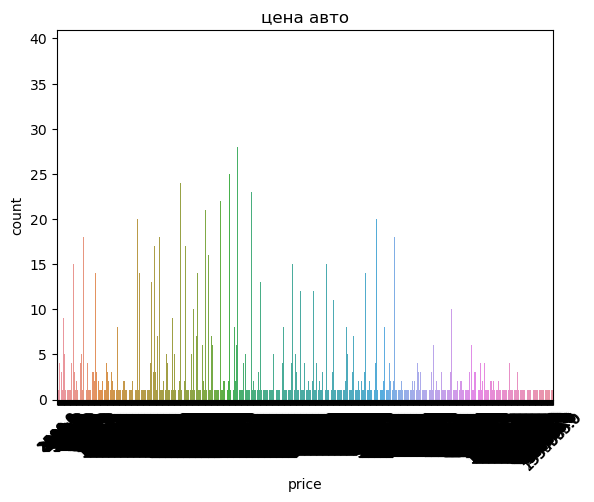

In [6]:
sns.countplot(x='price', data=df)
plt.title('цена авто')
plt.xticks(rotation=45)
plt.show()

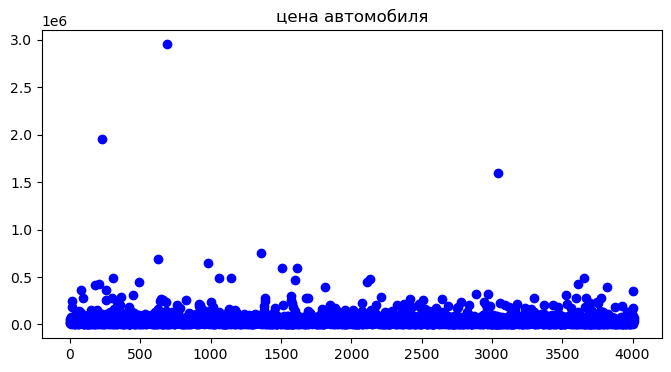

In [7]:
plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['price'], color='blue', label='цена авто')
plt.title('цена автомобиля')
plt.show()

для цены автомобиля можно увидеть довольно экстремальные значения, обусловленные экзотическими моделями в выборке

In [8]:
df.drop('clean_title', axis=1, inplace=True)
print(df['brand'].describe())

count     4009
unique      57
top       Ford
freq       386
Name: brand, dtype: object


# 57 уникальных значений

In [9]:
print(df['model'].describe())

count        4009
unique       1898
top       M3 Base
freq           30
Name: model, dtype: object


#1898 уникальных значений
#признаки бренд и модель лучше не использовать, поскольку брендов и моделей довольно разное количество и сложно адекватно присвоить каждому числовое значение, поэтому я собираюсь поделить автомобильные марки на три категории: стандарт, премиум и экзотические

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


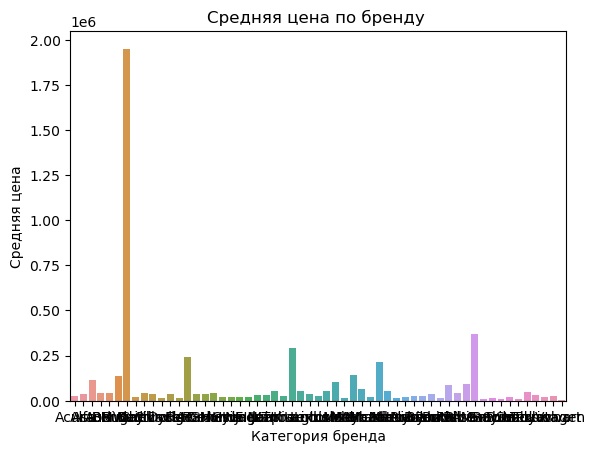

In [10]:
result19=df.groupby('brand')['price'].mean().reset_index()
sns.barplot(data=result19, x='brand', y='price')
plt.title('Средняя цена по бренду ')
plt.xlabel('Категория бренда')
plt.ylabel('Средняя цена')
plt.show()

# отсюда мы можем увидеть наиболее дорогие бренды, чтобы поделить их по цене

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


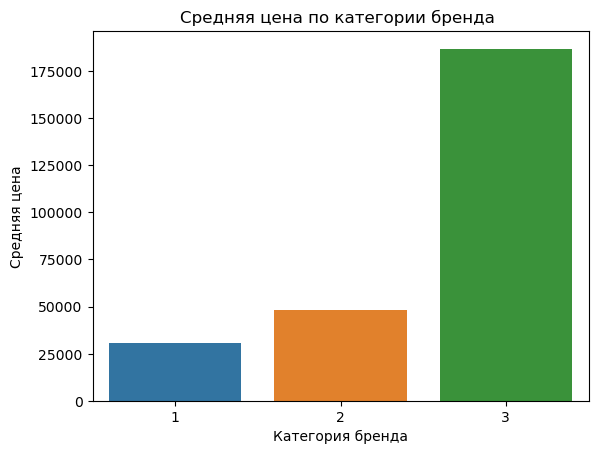

In [11]:
def categorize_brand(car):
    if car in ['Bentley', 'Aston', 'Lamborghini','Maserati','Alfa','Ferrari','Bugatti','Rolls-Royce',
 'McLaren', 'Lotus','Maybach']:
        return '3'
    elif car in ['Lexus','INFINITI','Audi','Acura','BMW','Tesla','Land','Jaguar','Mercedes-Benz','Genesis','Lucid','Porsche','Volvo', 'Cadillac','Rivian','Karma']:
        return '2'
    else:
        return '1'
df['brand_cat'] = df['brand'].apply(categorize_brand)
result18=df.groupby('brand_cat')['price'].mean().reset_index()



sns.barplot(data=result18, x='brand_cat', y='price')
plt.title('Средняя цена по категории бренда ')
plt.xlabel('Категория бренда')
plt.ylabel('Средняя цена')
plt.show()

# в третюю категорию попали самые дорогие авто

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


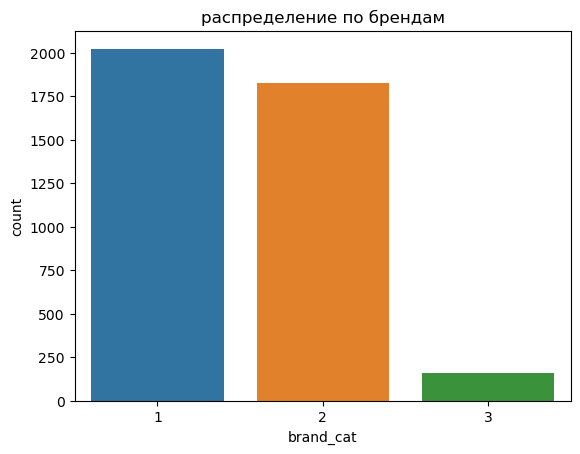

In [12]:
sns.countplot(x='brand_cat', data=df)
plt.title('распределение по брендам')
plt.show()

Можно увидеть, что автомобилей из самой дорогой категории брендов наименьшее количество

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


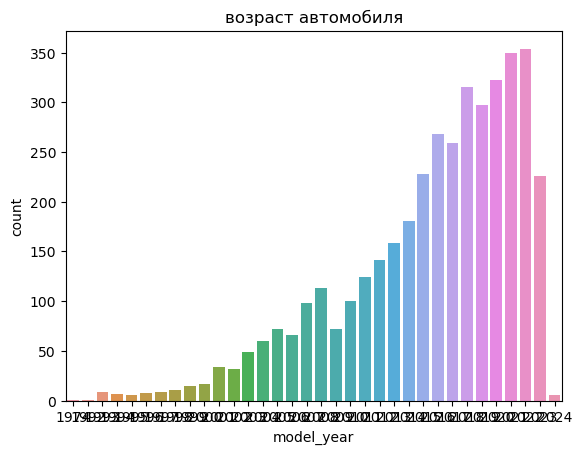

In [13]:
df['model_year'].astype(int)
df['age']=2024-df['model_year']
sns.countplot(x='model_year', data=df)
plt.title('возраст автомобиля')
plt.show()

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


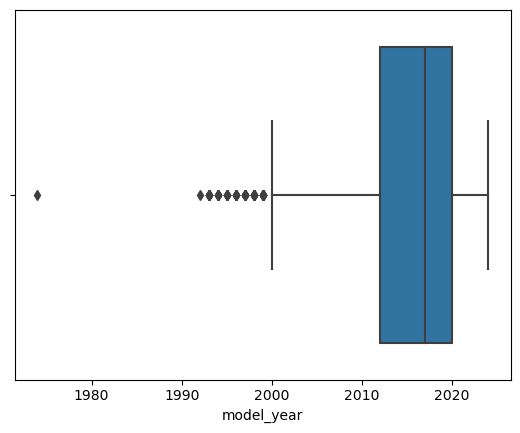

In [14]:
# в выобрке большее количество автомобилей 2020-х годов
sns.boxplot(x = 'model_year', data = df)
plt.show()
#основная часть авто с 2012 по 2020 года

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


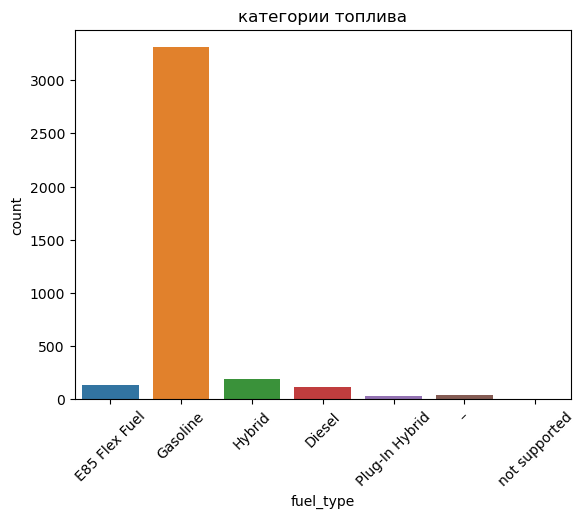

In [15]:
# перейдем к категориям топлива, мы знаем что среди них присутвуют пропущенные значения
sns.countplot(x='fuel_type', data=df)
plt.title('категории топлива')
plt.xticks(rotation=45)
plt.show()
#наиболее часто-встречающаяся категория- бензин

In [16]:
#найдем пропущенные значения
df['fuel_type'].unique()
missing_fuet = df['fuel_type'].isnull().sum()
missing_fueltype_rows = df[df['fuel_type'].isnull()]
# отсюда мы видим, что тип топлива пропущен у автомобилей с электрическим двигателем, можно это проверить, посмотрев датафрейм, в котором в двигателе содержится слово electric
filtered_df = missing_fueltype_rows[missing_fueltype_rows['engine'].str.contains('electric','-')]
# количество строк все еще 170, это означает что все пропущенные fueltype, это електродвигатели
df['fuel_type']=df['fuel_type'].fillna('electro')



c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


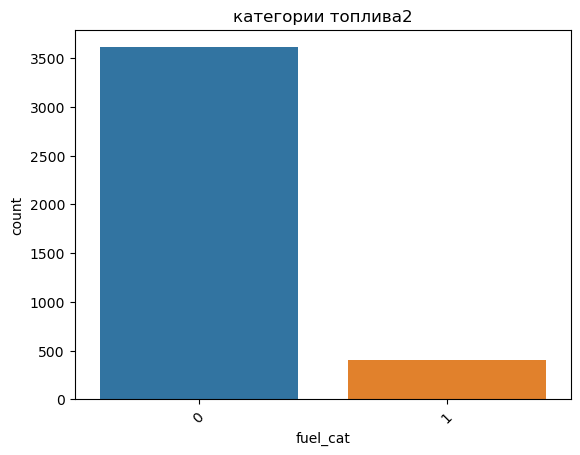

In [17]:
#для типа топлива будет логичным поделить на две категории: обычное топливо и электроэнергия
def categorize_fuel(fuel):
    if fuel in ['Hybrid','electro','Plug-In Hybrid','not supported']:
        return '1'
    else:
        return '0'
df['fuel_cat']=df['fuel_type'].apply(categorize_fuel)
sns.countplot(x='fuel_cat', data=df)
plt.title('категории топлива2')
plt.xticks(rotation=45)
plt.show()
# наибольшее количество авто- обычные двигатели

In [18]:
print(df['transmission'].value_counts())
#здесь можно увидеть 62 разных типа трансмиссии, на самом деле стоит их объединить, для большей эффективности модели, их можно разделить на автомат, робот, механика
filtered_df = df[df['transmission'].str.contains('auto|a/t', case=False, na=False)]
#print(filtered_df['transmission'].value_counts())
df['transmission'] = np.where(df['transmission'].str.contains('Shift', case=False), 'robot', df['transmission'])
df['transmission'] = np.where(df['transmission'].str.contains('auto|a/t|at|cvt', case=False), 'auto', df['transmission'])
df['transmission'] = np.where(df['transmission'].str.contains('manual|m/t|mt', case=False), 'manual', df['transmission'])
#все еще остаются значения которые не могут быть однозначно определены к какому- то типу, стоит записать их как other, 4-я категория
df['transmission'] = df['transmission'].apply(lambda x: x if x in ['manual', 'auto', 'robot'] else 'other')
# определить их можно по году выпуска автомобиля, более новые автомобили скорее оснащены роботом и автоматом 
result = df.groupby('transmission')['model_year'].mean().reset_index()

print(result)

transmission
A/T                                              1037
8-Speed A/T                                       406
Transmission w/Dual Shift Mode                    398
6-Speed A/T                                       362
6-Speed M/T                                       248
                                                 ... 
Automatic, 8-Spd PDK Dual-Clutch                    1
Auto, 6-Spd w/CmdShft                               1
Automatic, 8-Spd Sport w/Sport & Manual Modes       1
CVT-F                                               1
8-Speed Manual                                      1
Name: count, Length: 62, dtype: int64
  transmission   model_year
0         auto  2016.069921
1       manual  2010.219839
2        other  2015.625000
3        robot  2016.002288


  transmission         price
0         auto  41231.371339
1       manual  41202.056300
2        other  97400.250000
3        robot  68645.681922


c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


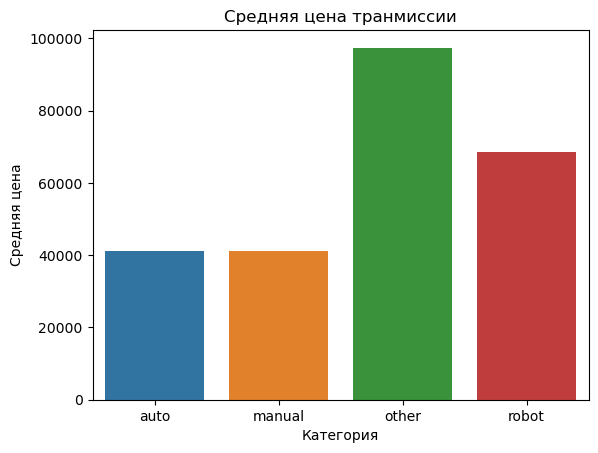

In [19]:
#можно увидеть, что средний год выпуска для автомата и для работа, примерно одинаковые, для категории other средний год 2015, их можно скорее отнести к автомату, поскольку робот все же более новая технология

result5 = df.groupby('transmission')['price'].mean().reset_index()
print(result5)
sns.barplot(data=result5, x='transmission', y='price')
plt.title('Средняя цена транмиссии')
plt.xlabel('Категория')
plt.ylabel('Средняя цена')
plt.show()

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


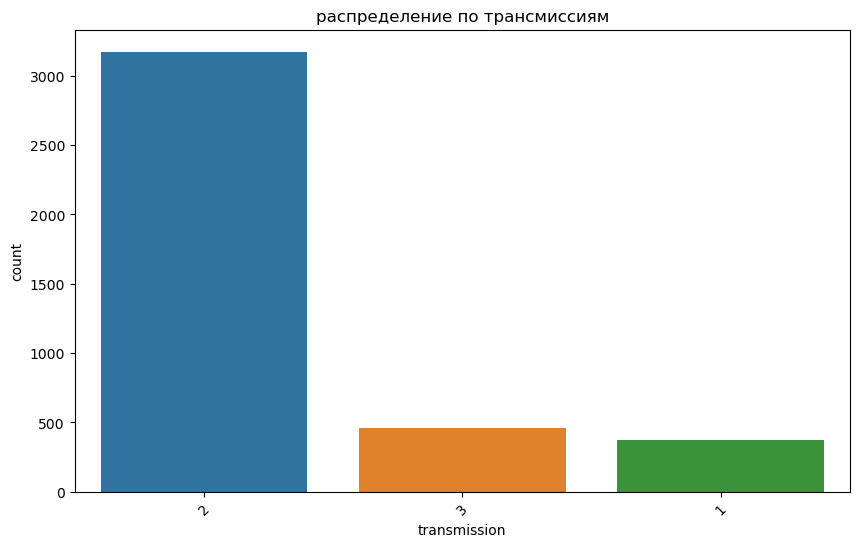

In [20]:
def categorize_trans(trans):
    if trans in ['robot']:
        return '3'
    elif trans in ['auto']:
        return '2'
    elif trans in ['manual']:
        return '1'
    else:
        return '3'
df['transmission']=df['transmission'].apply(categorize_trans)

plt.figure(figsize=(10, 6))


sns.countplot(x='transmission', data=df)
plt.title('распределение по трансмиссиям')
plt.xticks(rotation=45)
plt.show()
# наиболее популярная трансмиссия- автомат, робот и механика примерно на равне 

  ext_col_cat         price
0           1  42634.771371
1           2  42115.060902
2           3  54575.165242


c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


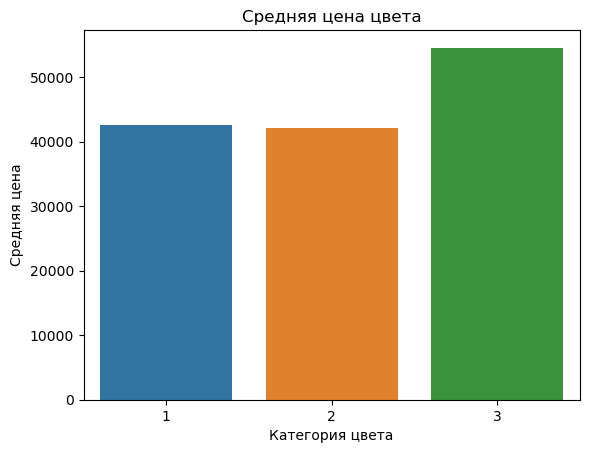

In [21]:
#можно увидеть чтое есть, как базовые цвета, так и различные их вариации, стоит объединить все цвета по базовому, например преобразовать конфетный красный в красный
df['ext_col'] = np.where(df['ext_col'].str.contains('red', case=False), 'red', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('black', case=False), 'black', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('green', case=False), 'green', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('white', case=False), 'white', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('brown', case=False), 'brown', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('orange', case=False), 'orange', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('blue', case=False), 'blue', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('gray|grey', case=False), 'gray', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('silver', case=False), 'blue', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('yellow', case=False), 'yellow', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('purple', case=False), 'purple', df['ext_col'])
df['ext_col'] = np.where(df['ext_col'].str.contains('biege|beige', case=False), 'biege', df['ext_col'])
df['ext_col'] = df['ext_col'].apply(lambda x: x if x in ['red', 'black', 'green','white','brown','blue','gray','yellow','purple','biege','orange'] else 'specific')
# цветов все равно большое количество, стоит поделить их на три категории, basic, colour, specific; цвет отличный от базового может указывать на лучшую комплектацию, поэтому им будут присвоены соответствующие значения 1,2 и 3

#print(df['ext_col'].value_counts())
def categorize_color(color):
    if color in ['black', 'white', 'grey','silver','biege']:
        return '1'
    elif color in ['red','green','brown','blue','yellow','purple','orange']:
        return '2'
    else:
        return '3'
df['ext_col_cat'] = df['ext_col'].apply(categorize_color)
result6 = df.groupby('ext_col_cat')['price'].mean().reset_index()
print(result6)

sns.barplot(data=result6, x='ext_col_cat', y='price')
plt.title('Средняя цена цвета')
plt.xlabel('Категория цвета')
plt.ylabel('Средняя цена')
plt.show()

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


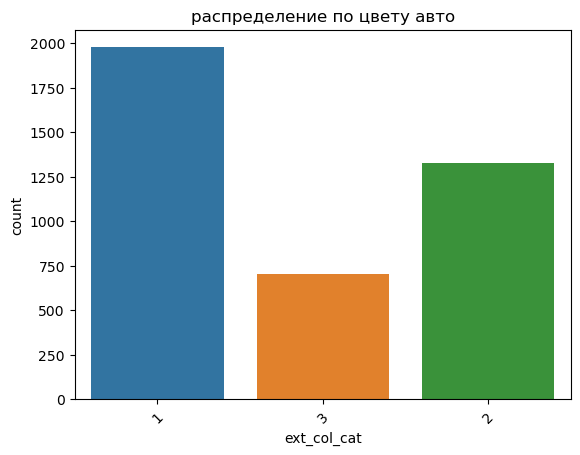

In [22]:
# данное предположение действительно подтвердилось, средняя цена для третьей категории наибольшая
sns.countplot(x='ext_col_cat', data=df)
plt.title('распределение по цвету авто')
plt.xticks(rotation=45)
plt.show()


c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


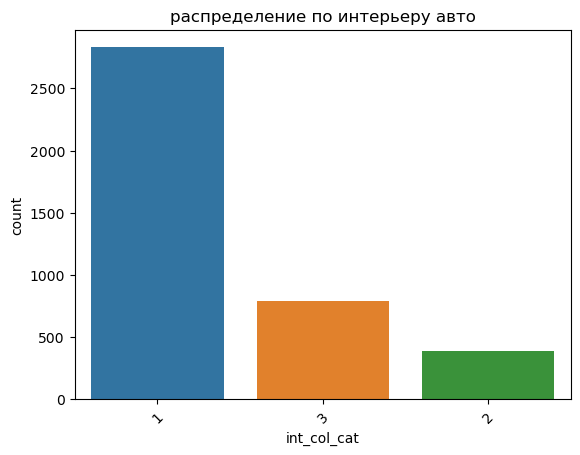

In [23]:
# тоже самое необходимо проделать для интерьера
df['int_col'] = np.where(df['int_col'].str.contains('red', case=False), 'red', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('black', case=False), 'black', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('green', case=False), 'green', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('white', case=False), 'white', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('brown', case=False), 'brown', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('orange', case=False), 'orange', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('blue', case=False), 'blue', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('gray|grey', case=False), 'gray', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('silver', case=False), 'blue', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('yellow', case=False), 'yellow', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('purple', case=False), 'purple', df['int_col'])
df['int_col'] = np.where(df['int_col'].str.contains('biege|beige', case=False), 'biege', df['int_col'])
df['int_col'] = df['int_col'].apply(lambda x: x if x in ['red', 'black', 'green','white','brown','blue','gray','yellow','purple','biege','orange'] else 'specific')
#print(df['int_col'].unique())
df['int_col_cat'] = df['int_col'].apply(categorize_color)


sns.countplot(x='int_col_cat', data=df)
plt.title('распределение по интерьеру авто')
plt.xticks(rotation=45)
plt.show()

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


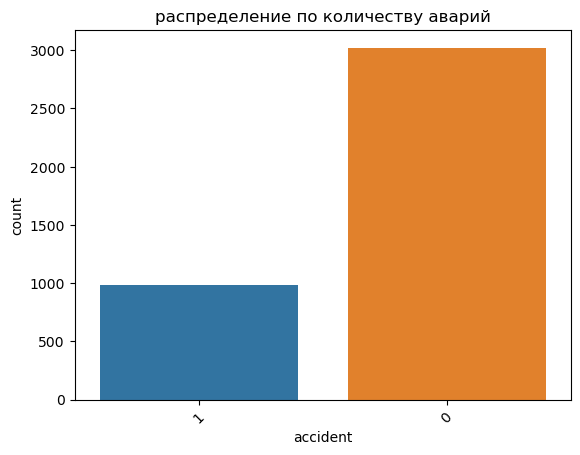

In [24]:
# теперь необходимо присвоить значения для accident, когда аварий не было значения получат 0, если были -1 



df['accident'] = np.where(df['accident'].str.contains('None reported', case=False), '0', df['accident'])
df['accident'] = np.where(df['accident'].str.contains('At least 1 accident or damage reported', case=False), '1', df['accident'])
#print(df['accident'].value_counts())
sns.countplot(x='accident', data=df)
plt.title('распределение по количеству аварий')
plt.xticks(rotation=45)
plt.show()

C:\Users\yaneg\AppData\Local\Temp\ipykernel_14832\3362560247.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df['litres'] != 0]
C:\Users\yaneg\AppData\Local\Temp\ipykernel_14832\3362560247.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pow']=df3['hp']/df3['litres']
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

303.309640870005
349.79901123595505
465.72864864864863


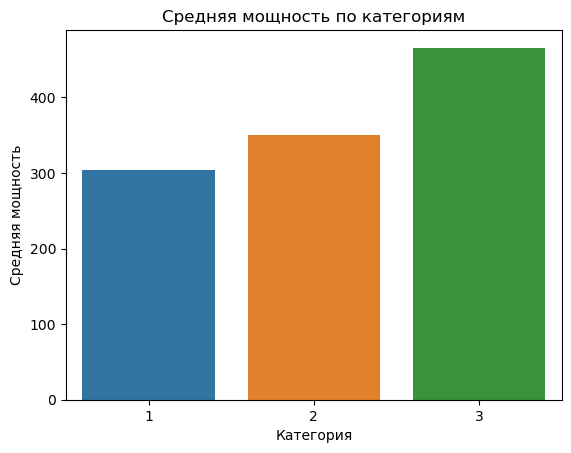

count    4009.000000
mean      330.827709
std       122.226756
min        70.000000
25%       244.000000
50%       315.000000
75%       400.000000
max      1020.000000
Name: hp, dtype: float64


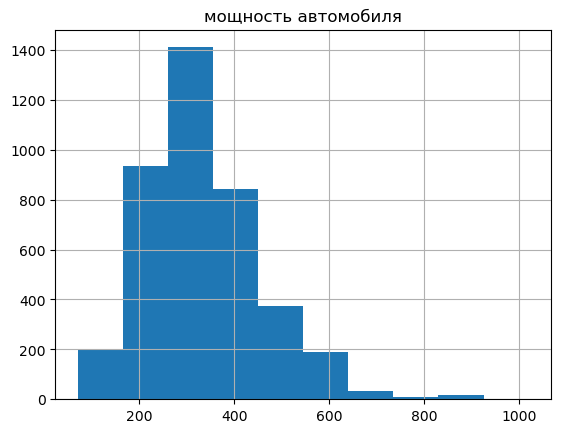

In [25]:
# у некоторых автомобилей написаны литры, однако отсутсвует запись о мощности, важно привести все к общему- к мощности, я планирую вычислить среднюю производительность лошадиных сил для одного литра из выборки и уже исходя из этого искать мощность по литрам


def extract_HP(s):
    
    match = re.search(r'\b\d*\b[.][0][H][P]', s)
    if match:
        return match.group(0) 
    return 0
def extract_volume(s):
    
    match = re.search(r'\d*[.][\d][L]|\d*[.][\d]\s[L]', s)
    if match:
        return match.group(0)  
    return 0

df['hp'] = df['engine'].apply(extract_HP)
df['litres']= df['engine'].apply(extract_volume)


df['hp'] = df['hp'].str.replace('HP', '', regex=False)
df['hp'] = df['hp'].str.replace('.0', '', regex=False)


df['litres']= df['litres'].str.replace('L', '', regex=False)


#filtered_df = df2[df2['hp'].str.contains('turbo|tsi', case=False, regex=True)]
df['hp'].fillna(0, inplace=True)
df['litres'].fillna(0, inplace=True)
df['hp'].astype(int)
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')
df['litres'] = pd.to_numeric(df['litres'], errors='coerce')
df['hp']=df['hp'].astype(float)


# Вычисление среднего значения для столбца 'HP'
#print(filtered_df['hp'].mean())
#print(mean_hp)

df2 = df[df['hp'] != 0]
df3 = df2[df['litres'] != 0]
df3['pow']=df3['hp']/df3['litres']
#print(df3)
#print(df3['pow'].mean())
#теперь мы знаем среднюю мощность с каждого литра , она составляет 92.4, посчитаем мощность для всех авто исходя из этого значения
df.loc[df['hp'] == 0, 'hp'] = df['litres'] * 92.4
#print(df['hp'].dtype)
#print(filtered_df1)
# автомобили у которых не найдены лошадиные силы, получат среднюю мощность в зависимости от категории бренда
zero_hp_rows = df.loc[df['hp'] == 0]

#print(zero_hp_rows)
#df2['hp'] = pd.to_numeric(df2['hp'], errors='coerce')
#print(df2['hp'].mean())
#print(df2)

df4=df[df['hp'] != 0]
#print(df4)
#найдем среднее значение мощности для каждой категории авто
cat1_hp = df4[df4['brand_cat'] == '1']
average_hp1 = cat1_hp['hp'].mean()
cat2_hp = df4[df4['brand_cat'] == '2']
average_hp2 = cat2_hp['hp'].mean()
cat3_hp = df4[df4['brand_cat'] == '3']
average_hp3 = cat3_hp['hp'].mean()
print(average_hp1)
print(average_hp2)
print(average_hp3)

#мы нашли среднюю мощность для каждой категории

result7 = df4.groupby('brand_cat')['hp'].mean().reset_index()

sns.barplot(data=result7, x='brand_cat', y='hp')
plt.title('Средняя мощность по категориям')
plt.xlabel('Категория')
plt.ylabel('Средняя мощность')
plt.show()
# мы видим, что авто из третьей категории наиболее мощные

df.loc[(df['hp'] == 0) & (df['brand_cat'] == '1'), 'hp'] = average_hp1
df.loc[(df['hp'] == 0) & (df['brand_cat'] == '2'), 'hp'] = average_hp2
df.loc[(df['hp'] == 0) & (df['brand_cat'] == '3'), 'hp'] = average_hp3


#print(df)

print(df['hp'].describe())
df['hp'].hist()
plt.title('мощность автомобиля')
plt.show()


# можно увидеть, что большинство значений располагаются в интервале от 250 до 400, одако сущетсвуют выбросы, которые присуще суперкарам, они начинаются после 650


Новая таблица для предсказания- df_W, в качестве целевого признака будет использоваться категория бренда, brand_cat

In [26]:
df_w=df[['milage','transmission','brand_cat','age','fuel_cat','ext_col_cat','int_col_cat','hp','accident','price']]
df_w

,milage,transmission,brand_cat,age,fuel_cat,ext_col_cat,int_col_cat,hp,accident,price
0,51000.0,2,1,11,0,1,1,300.000000,1,10300.0
1,34742.0,2,1,3,0,3,3,351.120000,1,38005.0
2,22372.0,2,2,2,0,2,1,323.400000,0,54598.0
3,88900.0,2,2,9,1,1,1,354.000000,0,15500.0
4,9835.0,2,2,3,0,1,1,184.800000,0,34999.0
...,...,...,...,...,...,...,...,...,...,...
4004,714.0,3,3,1,0,3,3,554.400000,0,349950.0
4005,10900.0,3,2,2,0,1,1,349.000000,0,53900.0
4006,2116.0,2,2,2,1,1,1,349.799011,0,90998.0
4007,33000.0,2,1,4,0,2,1,450.000000,0,62999.0


In [27]:
X = df_w.drop(['brand_cat'], axis=1)
y = df_w['brand_cat']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)



In [28]:
from sklearn.feature_selection import f_classif

f_statistic, p_value = f_classif(X, y)
importance_list = []

for i in range(len(X.columns)):
    if p_value[i] < 0.05:
        importance_list.append(X.columns[i])
        print(f"Признак {X.columns[i]} значим")
    else:
        print(f"Признак {X.columns[i]} не значим")

Признак milage значим
Признак transmission значим
Признак age значим
Признак fuel_cat значим
Признак ext_col_cat значим
Признак int_col_cat значим
Признак hp значим
Признак accident значим
Признак price значим


In [29]:
metrics_dict={}
time_dict={}

ONE VS REST

In [30]:
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier

k ближайших соседей

In [31]:
scoreList = []
i_values=[]
for i in range(1, 20, 1):
    knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=i))
    croos_val_score_knn_one = cross_validate(knn_ovr, X_train, y_train, cv=5, scoring='accuracy')['test_score']
    mean_cross_val=np.mean(croos_val_score_knn_one)
    scoreList.append(mean_cross_val)
    i_values.append(i)
max_score = max(scoreList)
max_index = scoreList.index(max_score)  # Индекс максимального значения
best_i = 1+i_values[max_index]


In [32]:
knn_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=best_i))

In [33]:
start_knn_ovr = time.time()
cv_score_knn_ovr = cross_validate(knn_ovr, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_knn_ovr = time.time()

Реализуем остальные методы

In [34]:

lr_ovr = OneVsRestClassifier(LogisticRegression(C=0.1))
svm_ovr=OneVsRestClassifier(SVC(C=0.1))
nb_ovr=OneVsRestClassifier(GaussianNB())
tree_ovr = OneVsRestClassifier(DecisionTreeClassifier(max_depth=10))

In [35]:
start_lr_ovr = time.time()
cv_score_lr_ovr = cross_validate(lr_ovr, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_lr_ovr = time.time()

In [36]:
start_svm_ovr = time.time()
cv_score_svm_ovr = cross_validate(svm_ovr, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_svm_ovr = time.time()

In [37]:
start_nb_ovr = time.time()
cv_score_nb_ovr = cross_validate(nb_ovr, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_nb_ovr = time.time()

In [38]:
start_tree_ovr = time.time()
cv_score_tree_ovr = cross_validate(tree_ovr, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tree_ovr = time.time()

In [39]:
metrics_dict['KNN OVR']=cv_score_knn_ovr
time_dict['KNN OVR']=end_knn_ovr-start_knn_ovr
metrics_dict['LR OVR']=cv_score_lr_ovr
time_dict['LR OVR']=end_lr_ovr-start_lr_ovr
metrics_dict['SVM OVR']=cv_score_svm_ovr
time_dict['SVM OVR']=end_svm_ovr-start_svm_ovr
metrics_dict['NB OVR']=cv_score_nb_ovr
time_dict['NB OVR']=end_nb_ovr-start_nb_ovr
metrics_dict['TREE OVR']=cv_score_tree_ovr
time_dict['TREE OVR']=end_tree_ovr-start_tree_ovr


ONE VS ONE

In [40]:
knn_ovo = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=best_i))
lr_ovo = OneVsOneClassifier(LogisticRegression(C=0.1))
svm_ovo=OneVsOneClassifier(SVC(C=0.1))
nb_ovo=OneVsOneClassifier(GaussianNB())
tree_ovo = OneVsOneClassifier(DecisionTreeClassifier(max_depth=10))

In [41]:
start_knn_ovo = time.time()
cv_score_knn_ovo = cross_validate(knn_ovo, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_knn_ovo = time.time()

In [42]:
start_lr_ovo = time.time()
cv_score_lr_ovo = cross_validate(lr_ovo, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_lr_ovo = time.time()

In [43]:
start_svm_ovo = time.time()
cv_score_svm_ovo = cross_validate(svm_ovo, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_svm_ovo = time.time()

In [44]:
start_nb_ovo = time.time()
cv_score_nb_ovo = cross_validate(nb_ovo, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_nb_ovo = time.time()

In [45]:
start_tree_ovo = time.time()
cv_score_tree_ovo = cross_validate(tree_ovo, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tree_ovo = time.time()

In [46]:
metrics_dict['KNN OVO']=cv_score_knn_ovo
time_dict['KNN OVO']=end_knn_ovo-start_knn_ovo
metrics_dict['LR OVO']=cv_score_lr_ovo
time_dict['LR OVO']=end_lr_ovo-start_lr_ovo
metrics_dict['SVM OVO']=cv_score_svm_ovo
time_dict['SVM OVO']=end_svm_ovo-start_svm_ovo
metrics_dict['NB OVO']=cv_score_nb_ovo
time_dict['NB OVO']=end_nb_ovo-start_nb_ovo
metrics_dict['TREE OVO']=cv_score_tree_ovo
time_dict['TREE OVO']=end_tree_ovo-start_tree_ovo

OUTPUT CODE

In [47]:
knn_oc = OutputCodeClassifier(KNeighborsClassifier(n_neighbors=best_i))
lr_oc = OutputCodeClassifier(LogisticRegression(C=0.1))
svm_oc=OutputCodeClassifier(SVC(C=0.1))
nb_oc=OutputCodeClassifier(GaussianNB())
tree_oc = OutputCodeClassifier(DecisionTreeClassifier(max_depth=10))

In [48]:
start_knn_oc = time.time()
cv_score_knn_oc = cross_validate(knn_oc, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_knn_oc = time.time()

In [49]:
start_lr_oc = time.time()
cv_score_lr_oc = cross_validate(lr_oc, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_lr_oc = time.time()

In [50]:
start_svm_oc = time.time()
cv_score_svm_oc = cross_validate(svm_oc, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_svm_oc = time.time()

In [51]:
start_nb_oc = time.time()
cv_score_nb_oc = cross_validate(nb_oc, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_nb_oc = time.time()

In [52]:
start_tree_oc = time.time()
cv_score_tree_oc = cross_validate(tree_oc, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tree_oc = time.time()

In [53]:
metrics_dict['KNN OC']=cv_score_knn_oc
time_dict['KNN OC']=end_knn_oc-start_knn_oc
metrics_dict['LR OC']=cv_score_lr_oc
time_dict['LR OC']=end_lr_oc-start_lr_oc
metrics_dict['SVM OC']=cv_score_svm_oc
time_dict['SVM OC']=end_svm_oc-start_svm_oc
metrics_dict['NB OC']=cv_score_nb_oc
time_dict['NB OC']=end_nb_oc-start_nb_oc
metrics_dict['TREE OC']=cv_score_tree_oc
time_dict['TREE OC']=end_tree_oc-start_tree_oc

In [54]:

result_metrics = pd.DataFrame(metrics_dict)
result_metrics

,KNN OVR,LR OVR,SVM OVR,NB OVR,TREE OVR,KNN OVO,LR OVO,SVM OVO,NB OVO,TREE OVO,KNN OC,LR OC,SVM OC,NB OC,TREE OC
0,0.544484,0.530249,0.571174,0.572954,0.651246,0.548043,0.533808,0.571174,0.567616,0.644128,0.537367,0.546263,0.540925,0.576512,0.669039
1,0.588235,0.557932,0.609626,0.590018,0.698752,0.586453,0.556150,0.600713,0.595365,0.672014,0.595365,0.545455,0.577540,0.593583,0.675579
2,0.597148,0.538324,0.591800,0.575758,0.675579,0.593583,0.541889,0.584670,0.570410,0.670232,0.602496,0.541889,0.581105,0.566845,0.620321
3,0.573975,0.573975,0.590018,0.581105,0.670232,0.579323,0.566845,0.581105,0.588235,0.688057,0.577540,0.577540,0.566845,0.565062,0.664884
4,0.586453,0.577540,0.598930,0.602496,0.670232,0.602496,0.579323,0.598930,0.584670,0.673797,0.607843,0.573975,0.586453,0.547237,0.670232


Для моей модели, самые лучшие результаты показало дерево решений, в реализации ONEVSREST. Самые худшие результаты по всем моделям можно увидеть у метода OUTPUTCODE

In [55]:
result_times=pd.DataFrame(time_dict,index=['Time'])
result_times

,KNN OVR,LR OVR,SVM OVR,NB OVR,TREE OVR,KNN OVO,LR OVO,SVM OVO,NB OVO,TREE OVO,KNN OC,LR OC,SVM OC,NB OC,TREE OC
Time,0.482712,0.736032,6.812813,0.277259,0.56748,0.946507,0.443812,4.70246,0.136671,0.314162,1.332021,1.118011,8.39957,0.846735,1.340417


По времени обучения можем увиидеть, что алгоритм svm в трех случаях обучался дольше всего. Более того, можно заметить, что для всех пяти алгоритмов стратегия outputcode занимала больше всего времени.

MULTILABLE CLASSIFICATION

Сделаем целевой признак brand_cat- бинарным и попробуем сделать регрессию таким образом

In [56]:
brand_dum = pd.get_dummies(df_w['brand_cat'], prefix = "brand")


frames = [df_w, brand_dum]
df_mc = pd.concat(frames, axis = 1)

# df_mc.head()
# df_mc=df_mc.drop(['brand_cat'])
df_mc

,milage,transmission,brand_cat,age,fuel_cat,ext_col_cat,int_col_cat,hp,accident,price,brand_1,brand_2,brand_3
0,51000.0,2,1,11,0,1,1,300.000000,1,10300.0,True,False,False
1,34742.0,2,1,3,0,3,3,351.120000,1,38005.0,True,False,False
2,22372.0,2,2,2,0,2,1,323.400000,0,54598.0,False,True,False
3,88900.0,2,2,9,1,1,1,354.000000,0,15500.0,False,True,False
4,9835.0,2,2,3,0,1,1,184.800000,0,34999.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,714.0,3,3,1,0,3,3,554.400000,0,349950.0,False,False,True
4005,10900.0,3,2,2,0,1,1,349.000000,0,53900.0,False,True,False
4006,2116.0,2,2,2,1,1,1,349.799011,0,90998.0,False,True,False
4007,33000.0,2,1,4,0,2,1,450.000000,0,62999.0,True,False,False


In [94]:
X1 = df_w.drop(columns=['brand_cat','accident'], axis=1)
y1 = df_w[['brand_cat','accident']]
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y1, test_size = 0.3, random_state=42)
scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
train11 = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
test11 = scaler.transform(X_test)
train1 = pd.DataFrame(train11, columns=X_train.columns)
test1 = pd.DataFrame(test11, columns=X_test.columns)



,brand_cat,accident
226,2,0
2819,1,1
535,3,1
3193,2,1
3224,1,0
...,...,...
1130,1,0
1294,1,1
860,1,0
3507,1,0


In [61]:
def report(model):
    print(f"Train score: {model.score(train1, y1_train)}; Test score: {model.score(test1, y1_test)}")

In [62]:
#KNN
from sklearn.multioutput import MultiOutputClassifier
knn_moc = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5))
knn_moc.fit(train1, y1_train)

report(knn_moc)


Train score: 0.766928011404134; Test score: 0.6608478802992519


In [63]:
#LR
lr_moc = MultiOutputClassifier(LogisticRegression(C=0.1))
lr_moc.fit(train1, y1_train)


report(lr_moc)

Train score: 0.6261582323592302; Test score: 0.6101413133832086


In [64]:
#SVM
svm_moc = MultiOutputClassifier(SVC(C=0.1))
svm_moc.fit(train1, y1_train)
report(svm_moc)

Train score: 0.6550249465431219; Test score: 0.628428927680798


In [65]:
#BAYES
nb_moc = MultiOutputClassifier(GaussianNB())
nb_moc.fit(train1, y1_train)
report(nb_moc)

Train score: 0.29044903777619385; Test score: 0.2809642560266002


In [66]:
#decision tree
tree_moc = MultiOutputClassifier(DecisionTreeClassifier(max_depth=10))
tree_moc.fit(train1, y1_train)
report(tree_moc)

Train score: 0.8096935138987883; Test score: 0.6874480465502909


In [67]:
from sklearn.ensemble import RandomForestClassifier
forest_moc = MultiOutputClassifier(RandomForestClassifier(n_estimators=550, max_depth=5))
forest_moc.fit(train1, y1_train)
report(forest_moc)


Train score: 0.7198859586600143; Test score: 0.6724854530340815


Classifier chain

In [100]:
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import jaccard_score
base_lr = LogisticRegression()
lr_cc=ClassifierChain(base_lr)

lr_cc.fit(train1, y1_train)


ClassifierChain(base_estimator=LogisticRegression())

In [101]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
knn=KNeighborsClassifier(n_neighbors=5)
knn_cc = ClassifierChain(knn)

knn_cc.fit(train1, y1_train)
y_pred=knn_cc.predict(train1)

In [102]:
#LR
lr_cc = ClassifierChain(LogisticRegression(C=0.1))
lr_cc.fit(train1, y1_train)




ClassifierChain(base_estimator=LogisticRegression(C=0.1))

In [103]:
#SVM
svm_cc = ClassifierChain(SVC(C=0.1))
svm_cc.fit(train1, y1_train)



ClassifierChain(base_estimator=SVC(C=0.1))

In [104]:
#BAYES
nb_cc = ClassifierChain(GaussianNB())
nb_cc.fit(train1, y1_train)

ClassifierChain(base_estimator=GaussianNB())

In [105]:
#decision tree
tree_cc = ClassifierChain(DecisionTreeClassifier(max_depth=10))
tree_cc.fit(train1, y1_train)

ClassifierChain(base_estimator=DecisionTreeClassifier(max_depth=10))

MULTIOUTPUT REGRESSION

In [82]:
df_w
X2=df_w.drop(columns=['milage','price'])
y2=df_w[['milage','price']]
train_target = pd.DataFrame()

for col in y2.columns:
    y2[col] = y2[col].apply(lambda x: np.log(x))
X2_train,X2_test,y2_train,y2_test=train_test_split(X2, y2, test_size = 0.3, random_state=42)
scaler = StandardScaler()  


train22 = scaler.fit_transform(X2_train)


test22 = scaler.transform(X2_test)
train2 = pd.DataFrame(train22, columns=X2_train.columns)
test2 = pd.DataFrame(test22, columns=X2_test.columns)




C:\Users\yaneg\AppData\Local\Temp\ipykernel_14832\3955918660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2[col] = y2[col].apply(lambda x: np.log(x))


In [84]:
def report(model):
    print(f"Train score: {model.score(train2, y2_train)}; Test score: {model.score(test2, y2_test)}")

In [99]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
#multioutputregressor
ridge_mor=MultiOutputRegressor(Ridge())
ridge_mor.fit(train2,y2_train)
report(ridge_mor)

Train score: 0.5453599649488645; Test score: 0.5313898225047988


In [98]:
#regressorchain
ridge_rc=RegressorChain(Ridge())
ridge_rc.fit(train2,y2_train)
report(ridge_rc)

Train score: 0.5453599649488646; Test score: 0.5313898225047988
